In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%cd ./drive/MyDrive/heart_segmentation-master

/content/drive/MyDrive/heart_segmentation-master


In [2]:
%tensorflow_version 1.x
!pip install imagecodecs

TensorFlow 1.x selected.
     |████████████████████████████████| 29.6 MB 64 kB/s 


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from unet import unet_reduzida, unet_completa, unet_n, dice_coef
from utils import get_images, separate_train_test, make_vol, image_preprocess, separate_train_test, roi

Using TensorFlow backend.


In [5]:
import glob
from keras import backend as K
import numpy as np
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from time import time

hd = [45 , 25, 40 , 40 , 13, 40, 42 , 33, 6 , 43 , 37 , 8 , 28, 18, 46 , 37, 41 , 41 , 33, 33 ]
hu = [112, 95, 113, 116, 91, 98, 109, 98, 67, 105, 104, 81, 97, 88, 103, 90, 110, 113, 92, 101]

x_train = sorted(glob.glob('data_heart/imagesTr/*'))
y_train = sorted(glob.glob('data_heart/labelsTr/*'))
img_xtrain, index_x = get_images(x_train,hd,hu)
img_ytrain, index_y = get_images(y_train,hd,hu)

#predict_vol = []
dice_metric = []
tempo = []
local = 'leaveoneout_reduz/'


In [6]:
d = "Index das imagens: \n" + str(index_x) + "\nIndex das Máscaras: \n" + str(index_y)

with open('./outputs/indices.txt', 'w') as f:
  f.write(str(d))

In [7]:
train_X, valid_X, index_train_x, index_test_x = separate_train_test(img_xtrain, index = 20)
train_ground, valid_ground, index_train_y, index_test_y = separate_train_test(img_ytrain, index = 20)

In [8]:
print(len(train_X))
print(len(train_ground))

1334
1334


In [10]:
w = 320
x1 = 90
x2 = 218

size_img = 128

train_X = roi(train_X, x1, x2, w, w)
valid_X = roi(train_ground, x1, x2, w, w)

In [ ]:
from skimage import io

def save_vol(vol, folder, name):
  count = 0
  for i in range(len(vol)):
    for j in range(len(vol[i])):
      io.imsave('./outputs/%s/%s_%s.png'%(folder, name, str("%04d"%count)), vol[i][j])
      count += 1

def save_img(img_list, folder, name):
  count = 0
  for i in range(len(img_list)):
    io.imsave('./outputs/%s/%s_%s.png'%(folder, name, str("%04d"%count)), img_list[i])
    count += 1

save_img(train_X, "A1_norm_images", "norm_image")
save_img(valid_X, "A2_GT_images", "GT_bin")

In [ ]:
print(np.min(train_X[0]))
print(np.max(train_X[0]))
print(np.min(valid_X[0]))
print(np.max(valid_X[0]))

0
255
0
255


In [ ]:
io.find_available_plugins()

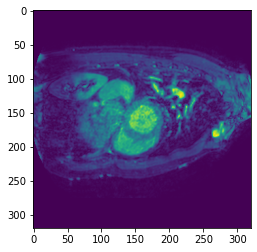

In [ ]:
plt.imshow(img_xtrain[0][0])

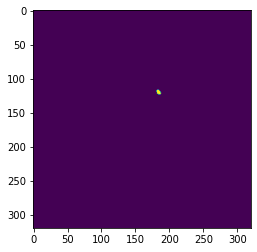

In [ ]:
from skimage import io

#img_a = io.imread('./outputs/A1_norm_images/norm_image_1.tif')
img_a = io.imread('./outputs/A2_GT_images/GT_bin_1.tif')

plt.imshow(img_a)

In [ ]:
_tam = [67, 70, 73, 76, 78, 58, 67, 65, 61, 62, 67, 73, 69, 70, 57, 53, 69, 72, 59, 68]
_tam_now = 0

In [ ]:
_tam_now = _tam_now + _tam[1]
print(_tam_now)

137


In [ ]:
sum([67, 70, 73, 76, 78, 58, 67, 65, 61, 62, 67, 73, 69, 70, 57, 53, 69, 72, 59, 68])

1334

In [ ]:
a = np.zeros((1334, 320, 320))
print(a.shape)

(1334, 320, 320)


In [ ]:
def leave_um_fora(list_orig, trim_a, trim_b):
  list1 = list_orig[:trim_a]
  list2 = list_orig[trim_b:]
  return np.concatenate((list1, list2), axis = 0)

leave_um_fora(a, _tam_now, _tam_now + _tam[2]).shape

(1261, 320, 320)

In [ ]:
1261 - 1334

-73